# **Title: Simple Linear Regression in Python and R**

Lab Objectives:
* To effectively use libraries for data analytics.
* To understand the use of regression Techniques in data analytics applications.

Lab Outcome(LO): Implement various Regression techniques for prediction. (LO2)


## **Python**

### Packages for Simple Linear Regression
* NumPy is a fundamental Python scientific package that allows many high-performance operations on single-dimensional and multidimensional arrays. It also offers many mathematical routines.
* The scikit-learn package is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classifying, clustering, and more.
* statsmodels is a statistical modeling library that provides classes and functions for estimating and testing different statistical models
* matplotlib provides a wide range of static, animated, and interactive plots, while seaborn is built on top of matplotlib and offers a high-level interface for statistical graphics.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pot
from scipy.stats import probplot
from sklearn.linear_model import LinearRegression

## Load Dataset
## **[Kaggle Dataset Link](https://www.kaggle.com/datasets/himanshunakrani/student-study-hours)**

In [2]:
DATA = '/content/drive/MyDrive/Dataset/study_vscore(linear_reg).csv'
data = pd.read_csv(DATA)

In [3]:
print(data.describe(),'\n')
print(data.info())
print(data.head())

           Hours     Scores
count  96.000000  96.000000
mean    5.267708  54.020833
std     2.503030  25.017459
min     1.000000  12.000000
25%     3.075000  30.750000
50%     5.250000  54.500000
75%     7.325000  74.250000
max     9.800000  99.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB
None
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


### Checking Normality and Linearity of Dataset

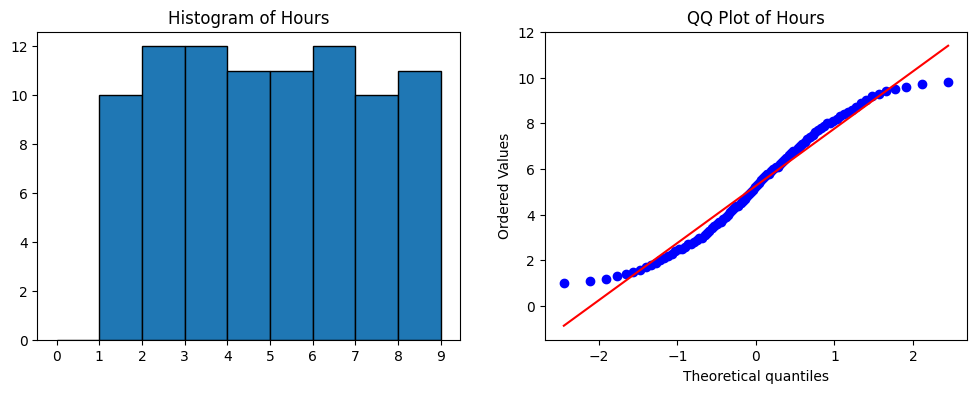

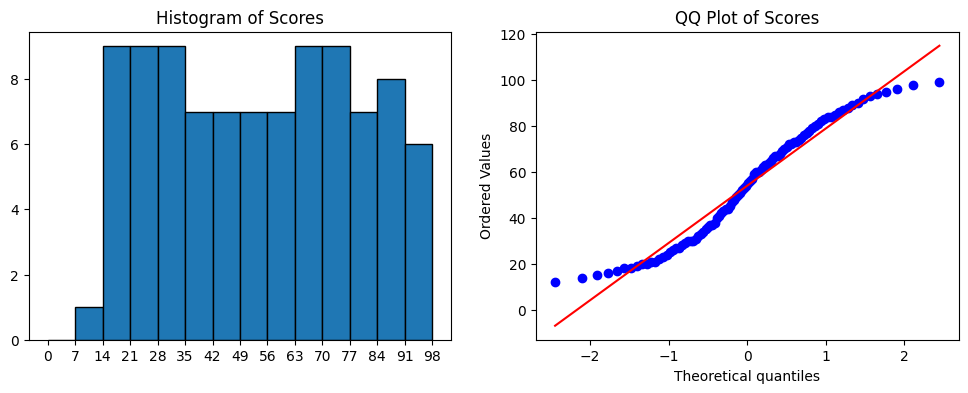

In [4]:
variables = data[['Hours','Scores']]

for column in variables:
  pot.figure(figsize=(12,4))
  pot.subplot(1, 2, 1)
  max = data[column].max()
  bins = np.arange(0, max, round(max/15))
  pot.hist(data[column], bins=bins, edgecolor='black')
  pot.xticks(bins)
  pot.title(f'Histogram of {column}')

  pot.subplot(1,2,2)
  probplot(data[column], dist='norm', plot=pot)
  pot.title(f'QQ Plot of {column}')
  pot.show()

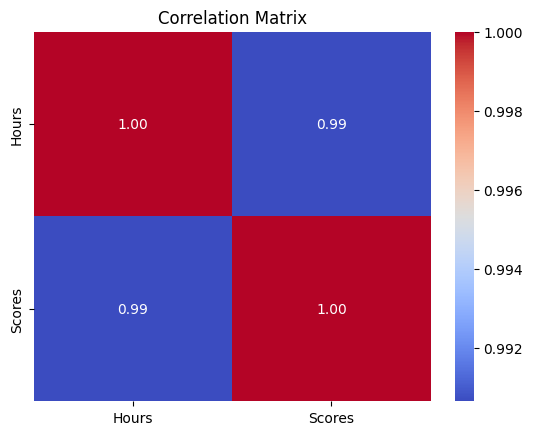

In [5]:
corr = data.corr()
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
pot.title('Correlation Matrix')
pot.show()


## Linear Regression Model

In [6]:
x = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values
model = LinearRegression()
model.fit(x,y)

prediction = model.predict(x)

print("Slope(b1):", model.coef_[0])
print("Intercept(b0):", model.intercept_)

Slope(b1): 9.901318259246043
Intercept(b0): 1.8635766281174497


## Visualizing Model

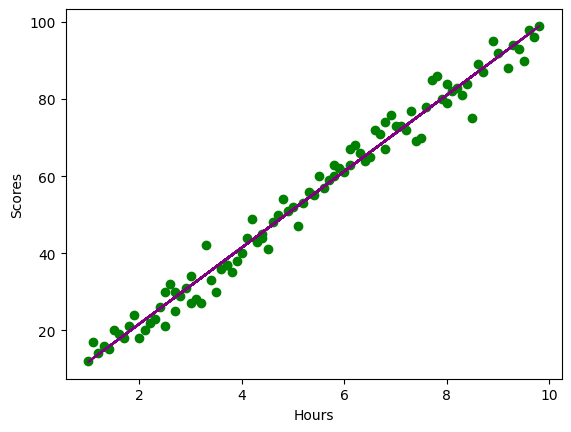

In [7]:
pot.scatter(x,y, color='green', marker='o')
pot.plot(x,prediction,color='purple')
pot.xlabel('Hours')
pot.ylabel('Scores')
pot.show()

## **R**
### Package for Simple Linear Regression

*   R stats is a package that contains many useful functions for statistical calculations and random number generation.
* R car package includes many functions for: ANOVA analysis, matrix and vector transformations, printing readable tables of coefficients from several regression models, creating residual plots, tests for the autocorrelation of error terms, and many other general interest statistical and graphing functions.
*  MASS package includes many useful functions and data examples, including functions for estimating linear models
*  R caret package contains many functions to streamline the model training process for complex regression and classification problems.






## Load Dataset

In [1]:
data <- read.csv('/content/drive/MyDrive/Dataset/study_vscore(linear_reg).csv')
str(data)
summary(data)

'data.frame':	96 obs. of  2 variables:
 $ Hours : num  2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 ...
 $ Scores: int  21 47 27 75 30 20 88 60 81 25 ...


     Hours           Scores     
 Min.   :1.000   Min.   :12.00  
 1st Qu.:3.075   1st Qu.:30.75  
 Median :5.250   Median :54.50  
 Mean   :5.268   Mean   :54.02  
 3rd Qu.:7.325   3rd Qu.:74.25  
 Max.   :9.800   Max.   :99.00  

## Check Normality and Linearity

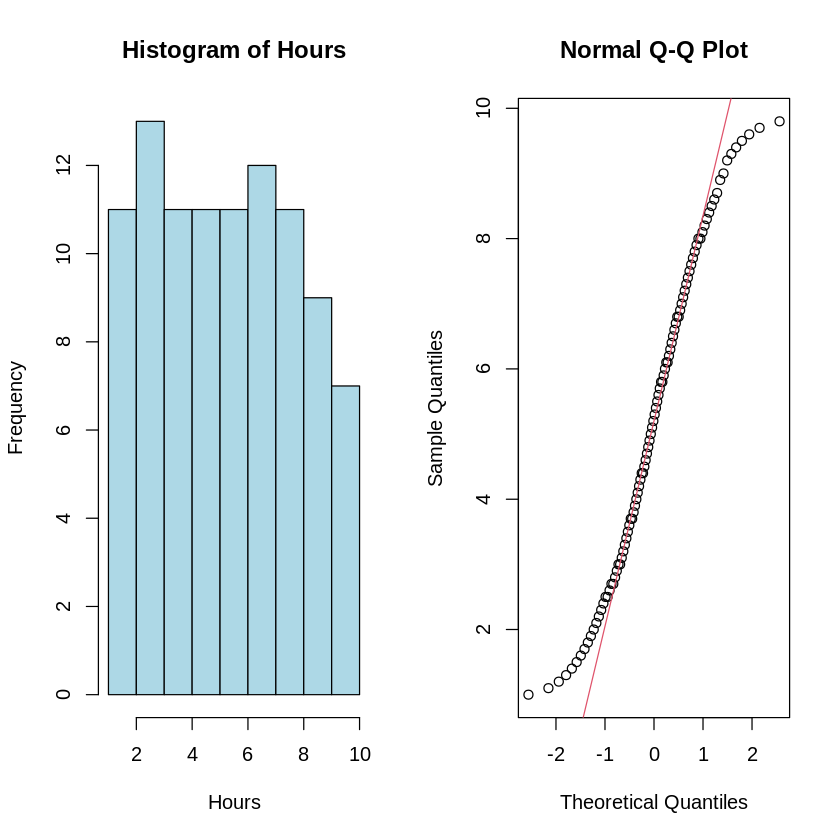

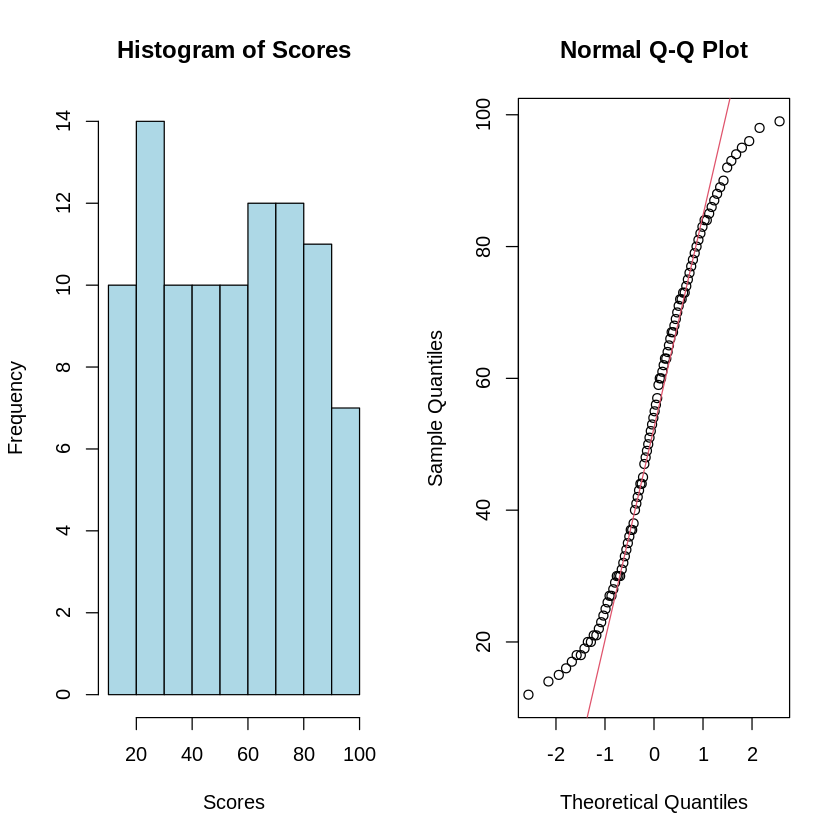

In [3]:
par(mfrow = c(1, 2))
hist(data$Hours, main = "Histogram of Hours", col = "lightblue", xlab = "Hours")
qqnorm(data$Hours)
qqline(data$Hours, col = 2)

hist(data$Scores, main = "Histogram of Scores", col = "lightblue", xlab = "Scores")
qqnorm(data$Scores)
qqline(data$Scores, col = 2)

In [4]:
shapiro.test(data$Scores)
shapiro.test(data$Hours)
cor.test(data$Hours, data$Scores)


	Shapiro-Wilk normality test

data:  data$Scores
W = 0.95193, p-value = 0.00146



	Shapiro-Wilk normality test

data:  data$Hours
W = 0.96068, p-value = 0.005689



	Pearson's product-moment correlation

data:  data$Hours and data$Scores
t = 70.363, df = 94, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9859785 0.9937565
sample estimates:
      cor 
0.9906399 


## Linear Regression Model

In [5]:
model <- lm(Scores ~ Hours, data = data)

summary(model)


Call:
lm(formula = Scores ~ Hours, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0248  -1.6391   0.0788   1.7754   7.4621 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.8636     0.8199   2.273   0.0253 *  
Hours         9.9013     0.1407  70.363   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.433 on 94 degrees of freedom
Multiple R-squared:  0.9814,	Adjusted R-squared:  0.9812 
F-statistic:  4951 on 1 and 94 DF,  p-value: < 2.2e-16


## Visualize Model

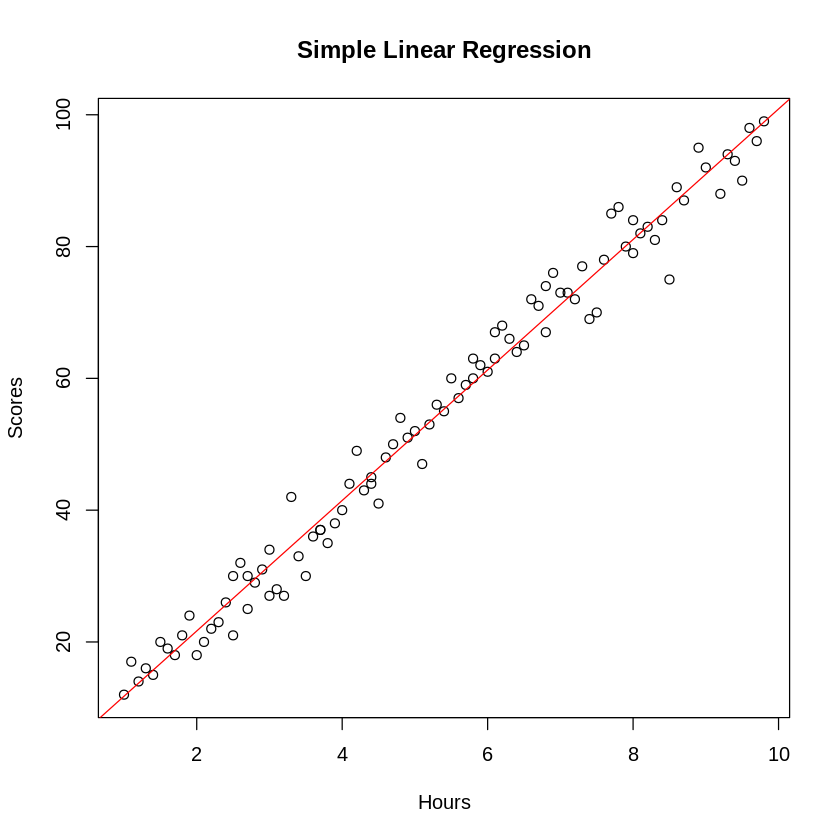

In [6]:
plot(data$Hours, data$Scores, main = "Simple Linear Regression", xlab = "Hours", ylab = "Scores")
abline(model, col = "red")

## **Conclusion:**
> We have successfully performed Simple Linear Regression in Python and R which provide tools to facilitate the examination of normality through histograms, Q-Q plots, and linearity through scatter plots and correlation matrices. These analyses enhance the credibility of subsequent regression models and predictions.

